In [1]:
import pandas as pd
import re
import glob

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def apply_function_name(row):
    if pd.isna(row):
        return "No Name"
    
    # eliminar signos de puntuación y caracteres especiales
    row = re.sub(r'[^\w\s]', '', row)
    # eliminar números
    row = re.sub(r'\d+', '', row)
    # eliminar espacios extra
    row = re.sub(r'\s+', ' ', row).strip()
    # convertir a minúsculas
    row = row.lower()
    # reemplazar multiples espacios por espacio simple
    row = re.sub(r'\s+', ' ', row)

    return row

## De base

In [4]:
df_1 = pd.read_csv('data/2025.csv')
df_2 = pd.read_csv('data/2024_2021.csv')
df_3 = pd.read_csv('data/2020_2017.csv')


In [5]:
# df_1.head()  # Display the first few rows of df_1

In [6]:
# df_2.head()  # Display the first few rows of df_2

In [7]:
df_projects_1 = df_1[["NOMBREPROYEC", "FACULTAD", "CARRERA"]].groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
df_projects_2 = df_2[["NOMBREPROYEC", "FACULTAD", "CARRERA"]].groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
df_projects_3 = df_3[["NOMBREPROYEC", "FACULTAD", "CARRERA"]].groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [8]:
df_projects = pd.concat([df_projects_1, df_projects_2]).groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).sum().reset_index().sort_values(by='counts', ascending=False)
df_projects = pd.concat([df_projects, df_projects_3]).groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).sum().reset_index().sort_values(by='counts', ascending=False)

In [9]:
df_projects.reset_index(drop=True, inplace=True)

In [10]:
df_projects.shape

(6863, 4)

In [11]:
df_projects.head()

,NOMBREPROYEC,FACULTAD,CARRERA,counts
0,PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...,Facultad de Ciencias Sociales y Humanísticas,Ingeniería en Negocios Internacionales,56
1,Variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,56
2,Tecnologías aplicadas y análisis económico en ...,Facultad de Ciencias Sociales y Humanísticas,Economía,54
3,Estudio de factibilidad para la comercializaci...,Facultad de Ciencias Sociales y Humanísticas,Economía,52
4,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,49


In [12]:
df_projects.tail()

,NOMBREPROYEC,FACULTAD,CARRERA,counts
6858,Diseño de una línea de proceso para la producc...,Facultad de Ingeniería en Mecánica y Ciencias ...,Ingeniería en Alimentos,1
6859,Producción de material audiovisual como insu...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño y Producción Audiovisual,1
6860,Valoración del potencial económico de las técn...,Facultad de Ciencias Sociales y Humanísticas,Economía Con Mención en Gestión Empresarial Es...,1
6861,Realización de un documental audiovisual sobr...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño y Producción Audiovisual,1
6862,Diseño de un sistema de comunicación de la avi...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño Gráfico y Publicitario,1


In [13]:
df_projects["NOMBREPROYEC"].iloc[0:3]

0    PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...
1    Variacion del tiempo de fraguado debido a mixt...
2    Tecnologías aplicadas y análisis económico en ...
Name: NOMBREPROYEC, dtype: object

In [14]:
# df_3[df_3["NOMBREPROYEC"] == df_projects["NOMBREPROYEC"].iloc[1]]#["ESTUDIANTE"].unique()
# # muchos estudiantes en un proyecto

FACULTAD
Facultad de Ingeniería en Electricidad y Computación                                    1369
Facultad de Ciencias Sociales y Humanísticas                                            1364
Facultad de Ingeniería en Mecánica y Ciencias de la Producción                          1264
Facultad de Ingeniería en Ciencias de la Tierra                                          710
Facultad de Ciencias Naturales y Matemáticas                                             651
Facultad de Arte, Diseño y Comunicación Audiovisual                                      613
Facultad de Ciencias de la Vida                                                          442
Facultad de Ingeniería Marítima y Ciencias del Mar                                       238
Escuela de Diseño y Comunicación Visual                                                  147
Facultad de Ingeniería Marítima, Ciencias Biológicas, Oceánicas y Recursos Naturales      65
Name: count, dtype: int64


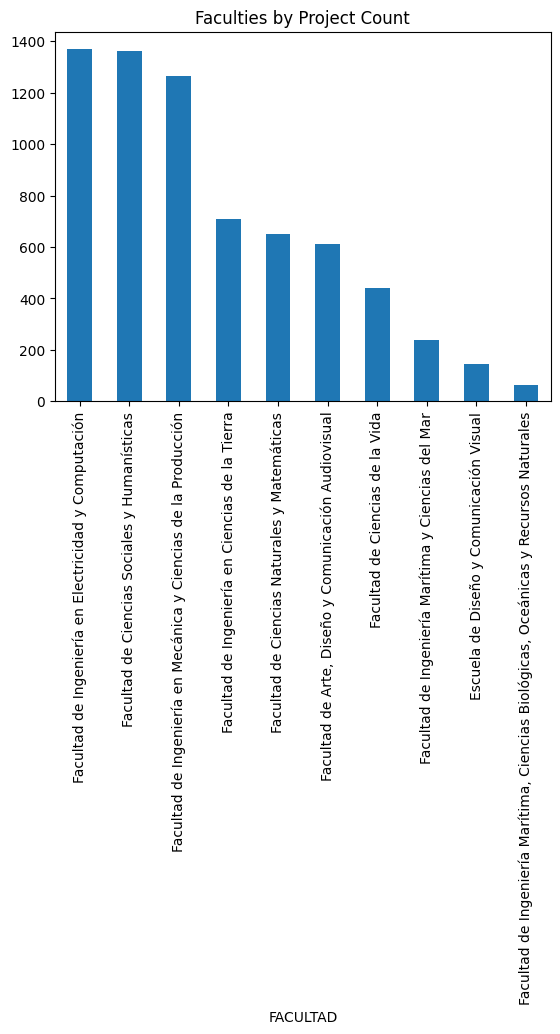

In [15]:
df_projects["FACULTAD"].value_counts().plot(kind='bar', title='Faculties by Project Count')
print(df_projects["FACULTAD"].value_counts())

<Axes: title={'center': 'Project Counts by Faculty and Career'}>

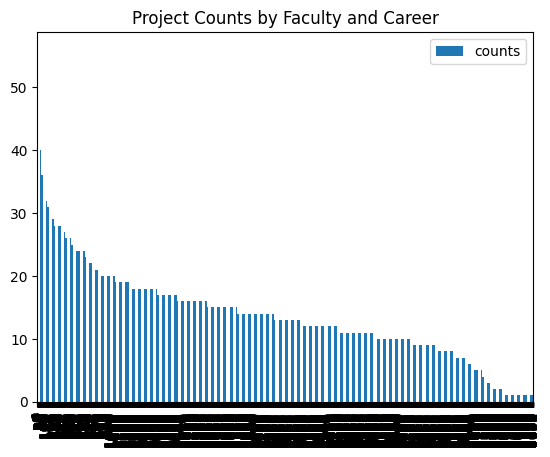

In [16]:
df_projects.plot(kind='bar', title='Project Counts by Faculty and Career')

In [17]:
df_projects["titulo"] = df_projects["NOMBREPROYEC"].apply(apply_function_name)

In [18]:
df_projects

,NOMBREPROYEC,FACULTAD,CARRERA,counts,titulo
0,PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...,Facultad de Ciencias Sociales y Humanísticas,Ingeniería en Negocios Internacionales,56,plan de negocios para la venta de snacks salud...
1,Variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,56,variacion del tiempo de fraguado debido a mixt...
2,Tecnologías aplicadas y análisis económico en ...,Facultad de Ciencias Sociales y Humanísticas,Economía,54,tecnologías aplicadas y análisis económico en ...
3,Estudio de factibilidad para la comercializaci...,Facultad de Ciencias Sociales y Humanísticas,Economía,52,estudio de factibilidad para la comercializaci...
4,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,49,monitoreo no intrusivo de cargas eléctricas en...
...,...,...,...,...,...
6858,Diseño de una línea de proceso para la producc...,Facultad de Ingeniería en Mecánica y Ciencias ...,Ingeniería en Alimentos,1,diseño de una línea de proceso para la producc...
6859,Producción de material audiovisual como insu...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño y Producción Audiovisual,1,producción de material audiovisual como insumo...
6860,Valoración del potencial económico de las técn...,Facultad de Ciencias Sociales y Humanísticas,Economía Con Mención en Gestión Empresarial Es...,1,valoración del potencial económico de las técn...
6861,Realización de un documental audiovisual sobr...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño y Producción Audiovisual,1,realización de un documental audiovisual sobre...


CARRERA
Mecánica                                                                      454
Ingeniería  Civil                                                             442
Economía                                                                      372
Computación                                                                   366
Ingeniería Industrial                                                         325
Administración de Empresas                                                    302
Diseño Gráfico                                                                296
Producción para Medios de Comunicación                                        283
Ingeniería Química                                                            254
Electrónica y Automatización                                                  251
Turismo                                                                       241
Telecomunicaciones                                                            234
Electric

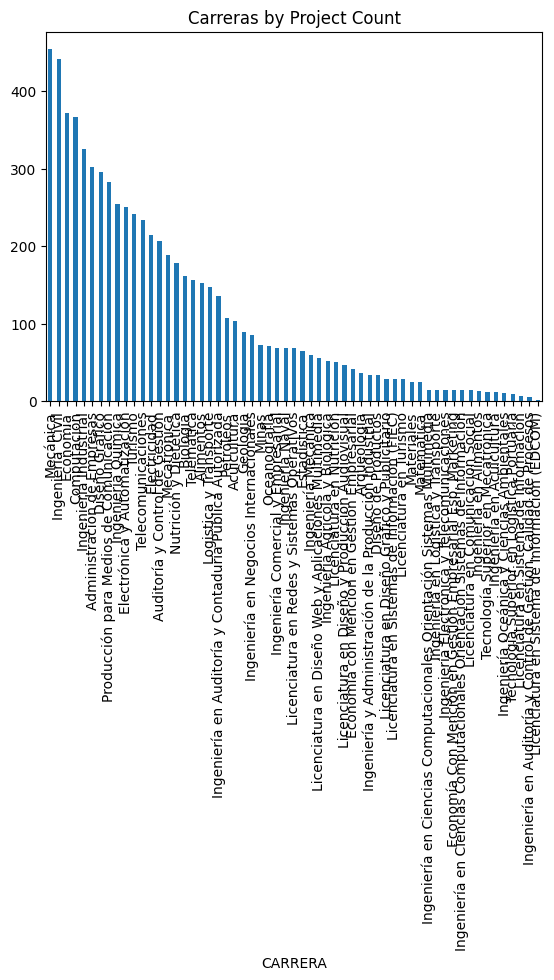

In [31]:
df_projects["CARRERA"].value_counts().plot(kind='bar', title='Carreras by Project Count')
print(df_projects["CARRERA"].value_counts())

## De las apis

In [20]:
folders_list = glob.glob('dspace/results/*/*.csv')

In [21]:
# concat in a single dataframe
df_complete = pd.DataFrame()
count_base = 0
for facultad in folders_list:
    print(facultad)
    df = pd.read_csv(facultad)
    print(df.shape)
    df_complete = pd.concat([df_complete, df])
    count_base += df.shape[0]
df_complete.reset_index(drop=True, inplace=True)

dspace/results\EDCOM\dspace_data_escuela_de_diseño_y_comunicación_visual.csv
(185, 4)
dspace/results\FADCOM\dspace_data_facultad_de_arte,_diseño_y_comunicación_audiovisual.csv
(714, 4)
dspace/results\FCNM\dspace_data_facultad_de_ciencias_naturales_y_matemáticas.csv
(1526, 4)
dspace/results\FCSH\dspace_data_facultad_de_ciencias_sociales_y_humanísticas.csv
(3531, 4)
dspace/results\FCV\dspace_data_facultad_de_ciencias_de_la_vida.csv
(491, 4)
dspace/results\FICT\dspace_data_facultad_de_ingeniería_en_ciencias_de_la_tierra.csv
(1423, 4)
dspace/results\FIEC\dspace_data_facultad_de_ingeniería_en_electricidad_y_computación.csv
(4338, 4)
dspace/results\FIMCM\dspace_data_facultad_de_ingeniería_marítima_y_ciencias_del_mar.csv
(799, 4)
dspace/results\FIMCP\dspace_data_facultad_de_ingeniería_en_mecánica_y_ciencias_de_la_producción.csv
(1665, 4)


In [22]:
print(f"Total projects in base: {count_base}")

Total projects in base: 14672


In [23]:
df_complete.shape

(14672, 4)

In [24]:
df_complete.head()

,NOMBREPROYEC,URL,CARRERA,FACULTAD
0,Campaña para prevenir el incremento de casos d...,https://dspace.espol.edu.ec/handle/123456789/1...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual
1,Realización de un Documental sobre la Alfarerí...,https://dspace.espol.edu.ec/handle/123456789/5...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual
2,Impactos y estrategias de adaptación al cambio...,https://dspace.espol.edu.ec/handle/123456789/5...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual
3,“Mal Etiquetado”,https://dspace.espol.edu.ec/handle/123456789/5...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual
4,Programa “Campus Deportivo” Episodio: Tenis de...,https://dspace.espol.edu.ec/handle/123456789/5...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual


In [25]:
df_complete.tail()

,NOMBREPROYEC,URL,CARRERA,FACULTAD
14667,Diseño de un sistema embobinador y secador de ...,https://dspace.espol.edu.ec/handle/123456789/5...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...
14668,Diseño de un sistema automatizado para clasifi...,https://dspace.espol.edu.ec/handle/123456789/5...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...
14669,Diseño de un Sistema para el Balanceo de Rotor...,https://dspace.espol.edu.ec/handle/123456789/6...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...
14670,Diseño de un dron acuático no tripulado para m...,https://dspace.espol.edu.ec/handle/123456789/5...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...
14671,Rediseño estructural y control de un transport...,https://dspace.espol.edu.ec/handle/123456789/5...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...


In [26]:
df_complete["titulo"] = df_complete["NOMBREPROYEC"].apply(apply_function_name)

In [27]:
df_complete

,NOMBREPROYEC,URL,CARRERA,FACULTAD,titulo
0,Campaña para prevenir el incremento de casos d...,https://dspace.espol.edu.ec/handle/123456789/1...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual,campaña para prevenir el incremento de casos d...
1,Realización de un Documental sobre la Alfarerí...,https://dspace.espol.edu.ec/handle/123456789/5...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual,realización de un documental sobre la alfarerí...
2,Impactos y estrategias de adaptación al cambio...,https://dspace.espol.edu.ec/handle/123456789/5...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual,impactos y estrategias de adaptación al cambio...
3,“Mal Etiquetado”,https://dspace.espol.edu.ec/handle/123456789/5...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual,mal etiquetado
4,Programa “Campus Deportivo” Episodio: Tenis de...,https://dspace.espol.edu.ec/handle/123456789/5...,Licenciatura en Diseño y Producción Audiovisual,Escuela de Diseño y Comunicación Visual,programa campus deportivo episodio tenis de mesa
...,...,...,...,...,...
14667,Diseño de un sistema embobinador y secador de ...,https://dspace.espol.edu.ec/handle/123456789/5...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...,diseño de un sistema embobinador y secador de ...
14668,Diseño de un sistema automatizado para clasifi...,https://dspace.espol.edu.ec/handle/123456789/5...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...,diseño de un sistema automatizado para clasifi...
14669,Diseño de un Sistema para el Balanceo de Rotor...,https://dspace.espol.edu.ec/handle/123456789/6...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...,diseño de un sistema para el balanceo de rotor...
14670,Diseño de un dron acuático no tripulado para m...,https://dspace.espol.edu.ec/handle/123456789/5...,Mecatrónica,Facultad de Ingeniería en Mecánica y Ciencias ...,diseño de un dron acuático no tripulado para m...


FACULTAD
Facultad de Ingeniería en Electricidad y Computación              4338
Facultad de Ciencias Sociales y Humanísticas                      3531
Facultad de Ingeniería en Mecánica y Ciencias de la Producción    1665
Facultad de Ciencias Naturales y Matemáticas                      1526
Facultad de Ingeniería en Ciencias de la Tierra                   1423
Facultad de Ingeniería Marítima y Ciencias del Mar                 799
Facultad de Arte, Diseño y Comunicación Audiovisual                714
Facultad de Ciencias de la Vida                                    491
Escuela de Diseño y Comunicación Visual                            185
Name: count, dtype: int64


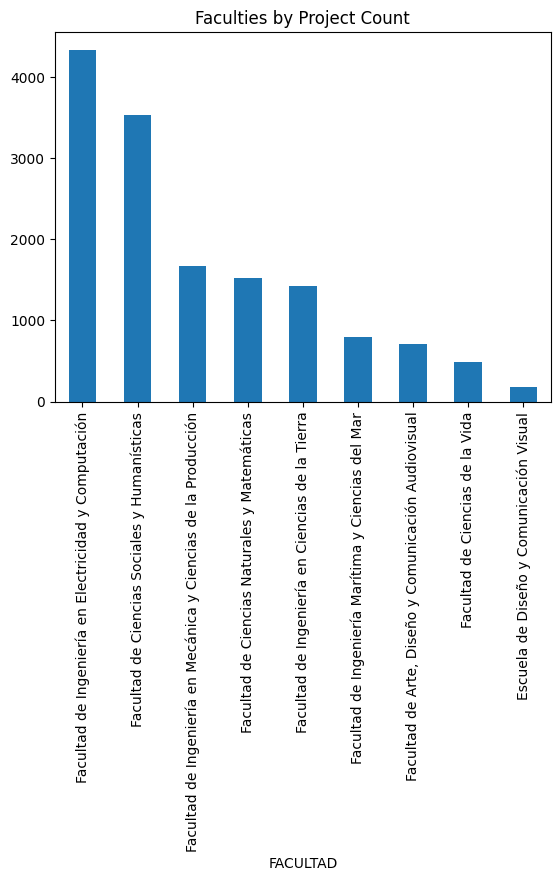

In [33]:
df_complete["FACULTAD"].value_counts().plot(kind='bar', title='Faculties by Project Count')
print(df_complete["FACULTAD"].value_counts())

CARRERA
Electricidad                                                                           1302
Economía                                                                               1299
Telecomunicaciones                                                                      898
Ingeniería Industrial                                                                   861
Ingeniería Comercial                                                                    843
Ingeniería Civil                                                                        649
Electrónica y Automatización                                                            603
Computación                                                                             552
Alimentos                                                                               513
Ingeniería en Auditoría y Contaduría Pública Autorizada                                 452
Petróleos                                                               

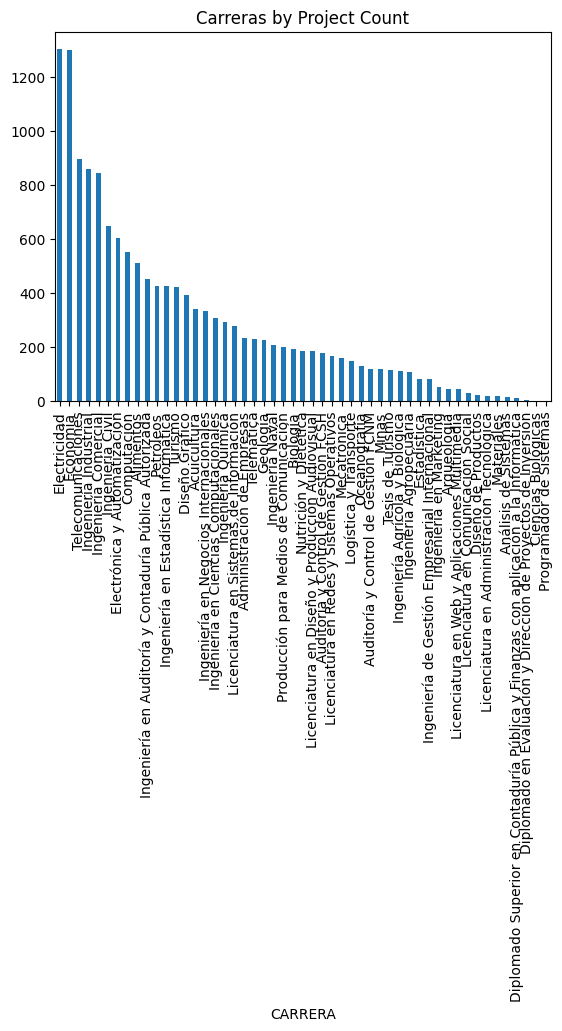

In [28]:
df_complete["CARRERA"].value_counts().plot(kind='bar', title='Carreras by Project Count')
print(df_complete["CARRERA"].value_counts())

## Proceso grupal

In [35]:
df_projects.shape, df_complete.shape, df_projects.shape[0] + df_complete.shape[0]

((6863, 5), (14672, 5), 21535)

In [39]:
df_projects_complete = pd.concat([df_projects, df_complete]).groupby(["titulo", "FACULTAD", "CARRERA"]).sum().reset_index().sort_values(by='counts', ascending=False)

In [40]:
df_projects_complete.shape

(19422, 6)

In [41]:
df_projects_complete

,titulo,FACULTAD,CARRERA,NOMBREPROYEC,counts,URL
15567,preparación de nano celulosa y su utilización ...,Facultad de Ciencias Naturales y Matemáticas,Ingeniería Química,Preparación de nano celulosa y su utilización ...,72.0,0
14410,monitoreo no intrusivo de cargas eléctricas en...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,71.0,0
5060,difusión del uso de herramientas tecnológicas ...,"Facultad de Arte, Diseño y Comunicación Audiov...",Diseño Gráfico,Difusión del uso de herramientas tecnológicas ...,62.0,0
15238,plan de negocios para la venta de snacks salud...,Facultad de Ciencias Sociales y Humanísticas,Ingeniería en Negocios Internacionales,PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...,56.0,0
19328,variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,Variacion del tiempo de fraguado debido a mixt...,56.0,0
...,...,...,...,...,...,...
25,acondicionamiento de una masa de pan molde bla...,Facultad de Ingeniería en Mecánica y Ciencias ...,Alimentos,Acondicionamiento de una masa de pan molde bla...,0.0,https://dspace.espol.edu.ec/handle/123456789/3...
4436,desarrollo de una metaheurística para resolver...,Facultad de Ciencias Naturales y Matemáticas,Logística y Transporte,Desarrollo de una metaheurística para resolver...,0.0,https://dspace.espol.edu.ec/handle/123456789/5...
27,acondicionamiento operación y calibración del ...,Facultad de Ingeniería en Ciencias de la Tierra,Petróleos,"Acondicionamiento, operación y calibración del...",0.0,https://dspace.espol.edu.ec/handle/123456789/6247
4439,desarrollo de una metodología de selección de ...,Facultad de Ingeniería en Mecánica y Ciencias ...,Alimentos,Desarrollo de una metodología de selección de ...,0.0,https://dspace.espol.edu.ec/handle/123456789/3...


FACULTAD
Facultad de Ingeniería en Electricidad y Computación                                    5034
Facultad de Ciencias Sociales y Humanísticas                                            4532
Facultad de Ingeniería en Mecánica y Ciencias de la Producción                          2493
Facultad de Ciencias Naturales y Matemáticas                                            2057
Facultad de Ingeniería en Ciencias de la Tierra                                         2010
Facultad de Arte, Diseño y Comunicación Audiovisual                                     1143
Facultad de Ingeniería Marítima y Ciencias del Mar                                       961
Facultad de Ciencias de la Vida                                                          798
Escuela de Diseño y Comunicación Visual                                                  329
Facultad de Ingeniería Marítima, Ciencias Biológicas, Oceánicas y Recursos Naturales      65
Name: count, dtype: int64


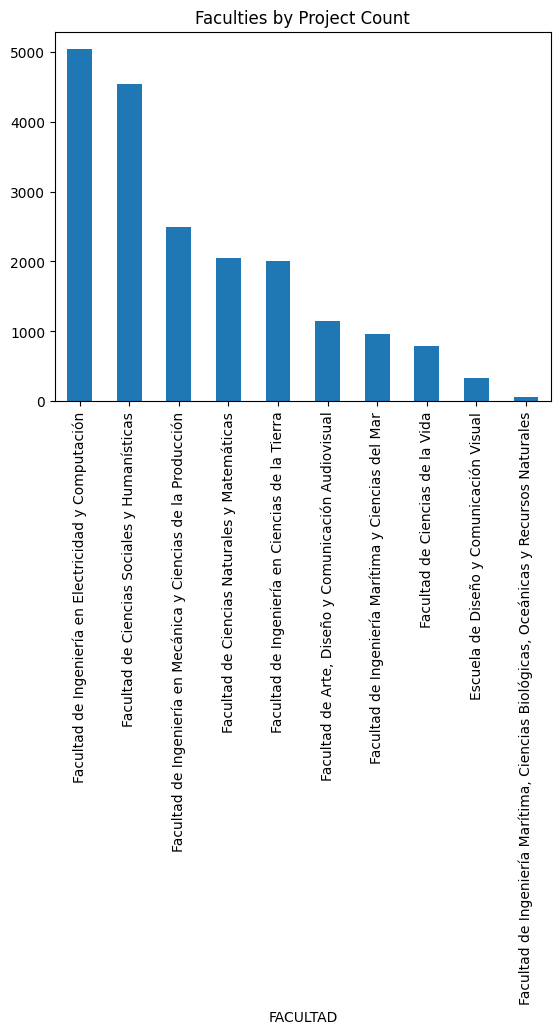

In [42]:
df_projects_complete["FACULTAD"].value_counts().plot(kind='bar', title='Faculties by Project Count')
print(df_projects_complete["FACULTAD"].value_counts())

In [48]:
print(df_projects_complete["CARRERA"].value_counts().head(10))

CARRERA
Economía                        1523
Electricidad                    1371
Ingeniería Industrial           1018
Telecomunicaciones               979
Ingeniería Comercial             836
Computación                      772
Electrónica y Automatización     739
Ingeniería Civil                 638
Diseño Gráfico                   600
Turismo                          577
Name: count, dtype: int64


CARRERA
Economía                                                             1523
Electricidad                                                         1371
Ingeniería Industrial                                                1018
Telecomunicaciones                                                    979
Ingeniería Comercial                                                  836
                                                                     ... 
Ingeniería en Auditoría y Control de Gestión. Calidad de Procesos       5
Diplomado en Evaluación y Dirección de Proyectos de Inversión           5
Ciencias Biológicas                                                     3
Licenciatura en Sistema de Información (EDCOM)                          1
Programador de Sistemas                                                 1
Name: count, Length: 78, dtype: int64


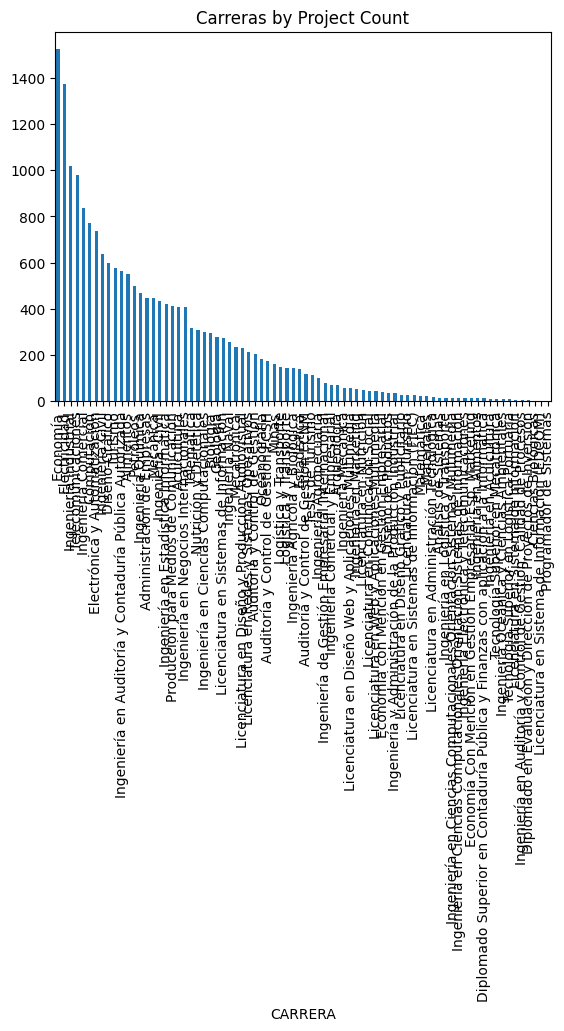

In [49]:
df_projects_complete["CARRERA"].value_counts().plot(kind='bar', title='Carreras by Project Count')
print(df_projects_complete["CARRERA"].value_counts())

## Match de carreras

In [51]:
df_carreras = pd.read_csv('data/carreras_activas.csv')

In [103]:
df_carreras_2 = df_carreras[["IDPROGRAMA", "IDPROGRAMAPADRE", "NOMBRE", "ESTADO", "CONSIDERARPADRE", "ESTAVIGENTE"]]

In [104]:
df_carreras_activas = df_carreras_2[df_carreras_2["ESTAVIGENTE"] == "S"]

In [106]:
# df_carreras_activas[df_carreras_activas["NOMBRE"] == "Ingeniería Comercial y Empresarial"]
df_carreras_activas[df_carreras_activas["NOMBRE"] == "Computación"]

,IDPROGRAMA,IDPROGRAMAPADRE,NOMBRE,ESTADO,CONSIDERARPADRE,ESTAVIGENTE
193,236,NaN,Computación,A,S,S


In [77]:
df_carreras_activas["NOMBRE"].value_counts()

NOMBRE
Ingeniería Química                                 3
Biología                                           2
Ingeniería Comercial y Empresarial                 2
Ingeniería Agrícola y Biológica                    2
Secretariado Bilingüe en Sistema de Información    2
                                                  ..
Matemática                                         1
Mecánica                                           1
Oceanografía                                       1
Tecnología Superior en Logistica Portuaria         1
Tecnología Superior en Mecatrónica                 1
Name: count, Length: 106, dtype: int64

In [75]:
"Licenciatura en Sistema de Información (EDCOM)" in df_carreras_activas["NOMBRE"].value_counts().keys()

True

In [62]:
df_projects_complete_activas = df_projects_complete[df_projects_complete["CARRERA"].isin(df_carreras_activas["NOMBRE"])]
df_projects_complete_no_activas = df_projects_complete[~df_projects_complete["CARRERA"].isin(df_carreras_activas["NOMBRE"])]

In [64]:
df_projects_complete_activas.shape, df_projects_complete_no_activas.shape, df_projects_complete_activas.shape[0] + df_projects_complete_no_activas.shape[0] == df_projects_complete.shape[0]

((17644, 6), (1778, 6), True)

CARRERA
Economía                                                   1523
Electricidad                                               1371
Ingeniería Industrial                                      1018
Telecomunicaciones                                          979
Computación                                                 772
Electrónica y Automatización                                739
Ingeniería Civil                                            638
Diseño Gráfico                                              600
Turismo                                                     577
Ingeniería en Auditoría y Contaduría Pública Autorizada     565
Alimentos                                                   550
Petróleos                                                   497
Ingeniería Química                                          468
Administración de Empresas                                  449
Mecánica                                                    448
Ingeniería  Civil               

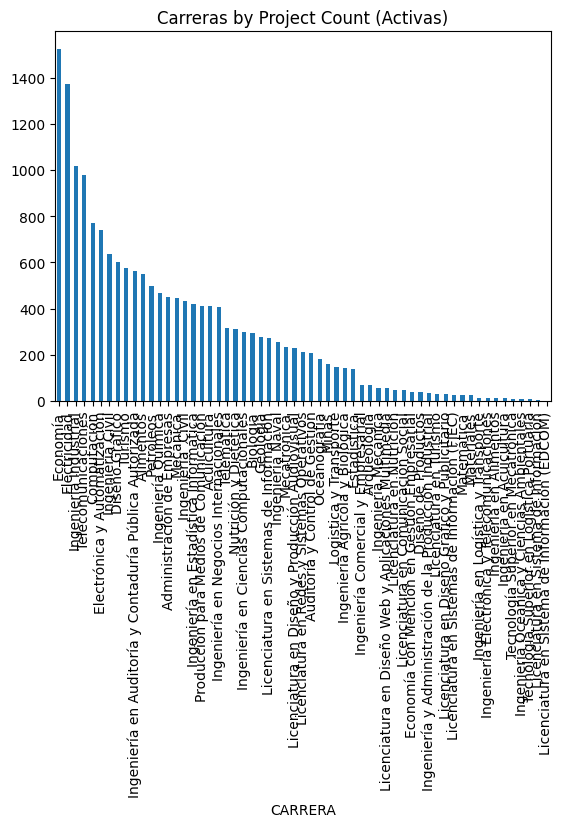

In [80]:
df_projects_complete_activas["CARRERA"].value_counts().plot(kind='bar', title='Carreras by Project Count (Activas)')
df_projects_complete_activas["CARRERA"].value_counts()

CARRERA
Ingeniería Comercial                                                                   836
Auditoría y Control de Gestión FCSH                                                    174
Logística y Transporte                                                                 149
Auditoría y Control de Gestión FCNM                                                    119
Tesis de Turismo                                                                       115
Ingenieria Agropecuaria                                                                103
Ingeniería de Gestión Empresarial Internacional                                         80
Ingeniería en Marketing                                                                 52
Licenciatura en Web y Aplicaciones Multimedia                                           44
Licenciatura en Administración Tecnológica                                              20
Análisis de Sistemas                                                              

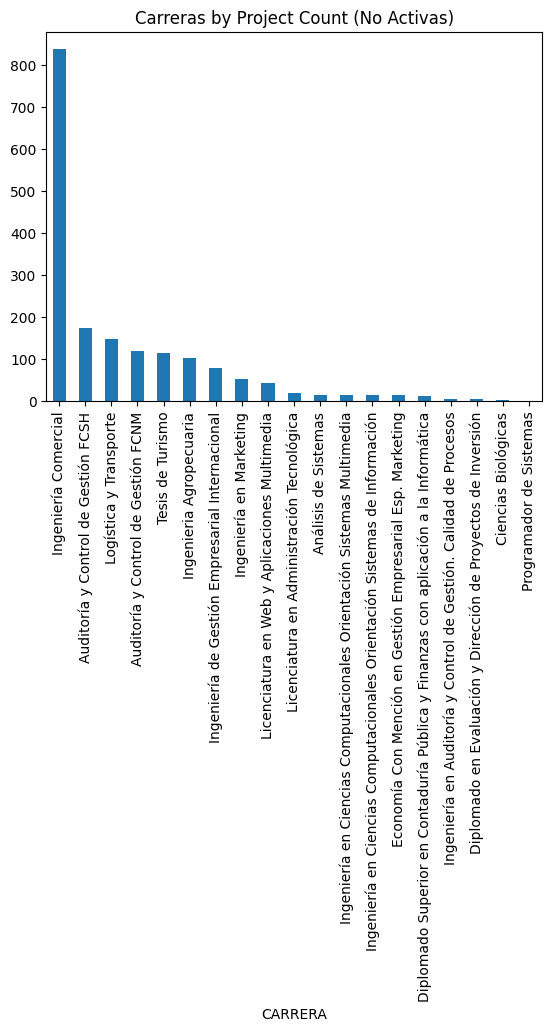

In [66]:
df_projects_complete_no_activas["CARRERA"].value_counts().plot(kind='bar', title='Carreras by Project Count (No Activas)')
df_projects_complete_no_activas["CARRERA"].value_counts()

In [ ]:
mapeo_carreras = {
    'Ingeniería Comercial': 'Ingeniería Comercial y Empresarial',
    'Auditoría y Control de Gestión FCSH': 'Auditoría y Control de Gestión',
    'Auditoría y Control de Gestión FCNM': 'Auditoría y Control de Gestión',
    'Logística y Transporte': 'Logistica y Transporte',
    'Tesis de Turismo': 'Turismo',
    'Ingenieria Agropecuaria': 'Ingeniería Agrícola y Biológica',
    'Ingeniería de Gestión Empresarial Internacional': 'Ingeniería en Negocios Internacionales',
    'Ingeniería en Marketing': 'Administración de Empresas',
    'Licenciatura en Web y Aplicaciones Multimedia': 'Licenciatura en Diseño Web y Aplicaciones Multimedia',
    'Licenciatura en Administración Tecnológica': 'Administración de Empresas',
    'Análisis de Sistemas': 'Licenciatura en Sistemas de Información',
    
    'Ingeniería en Ciencias Computacionales Orientación Sistemas Multimedia': 'Computación',
    'Ingeniería en Ciencias Computacionales Orientación Sistemas de Información': 'Ingeniería en Ciencias Computacionales',

    'Economía Con Mención en Gestión Empresarial Esp. Marketing': 'Economía con Mención en Gestión Empresarial',
    'Diplomado Superior en Contaduría Pública y Finanzas con aplicación a la Informática': 'Ingeniería en Auditoría y Contaduría Pública Autorizada',
    'Ingeniería en Auditoría y Control de Gestión. Calidad de Procesos': 'Auditoría y Control de Gestión',
    'Diplomado en Evaluación y Dirección de Proyectos de Inversión': 'Administración de Empresas',
    'Ciencias Biológicas': 'Biología',
    'Programador de Sistemas': 'Computación'
}

In [83]:
df_projects_complete_no_activas_mapped = df_projects_complete_no_activas.copy()
df_projects_complete_no_activas_mapped['CARRERA'] = df_projects_complete_no_activas_mapped['CARRERA'].replace(mapeo_carreras)

In [96]:
df_activas_copy = df_projects_complete_activas.copy()
df_no_activas_copy = df_projects_complete_no_activas_mapped.copy()
df_activas_copy['ESTADO'] = 'Activa'
df_no_activas_copy['ESTADO'] = 'No Activa'

In [97]:
df_projects_combined = pd.concat([df_activas_copy, df_no_activas_copy], ignore_index=True)

In [99]:
df_projects_combined.shape, df_projects_combined[df_projects_combined["CARRERA"].isin(df_carreras_activas["NOMBRE"])].shape

((19422, 7), (19422, 7))

CARRERA
Economía                                                   1523
Electricidad                                               1371
Ingeniería Industrial                                      1018
Telecomunicaciones                                          979
Ingeniería Comercial y Empresarial                          905
Computación                                                 788
Electrónica y Automatización                                739
Turismo                                                     692
Ingeniería Civil                                            638
Diseño Gráfico                                              600
Ingeniería en Auditoría y Contaduría Pública Autorizada     578
Alimentos                                                   550
Administración de Empresas                                  526
Auditoría y Control de Gestión                              505
Petróleos                                                   497
Ingeniería en Negocios Internaci

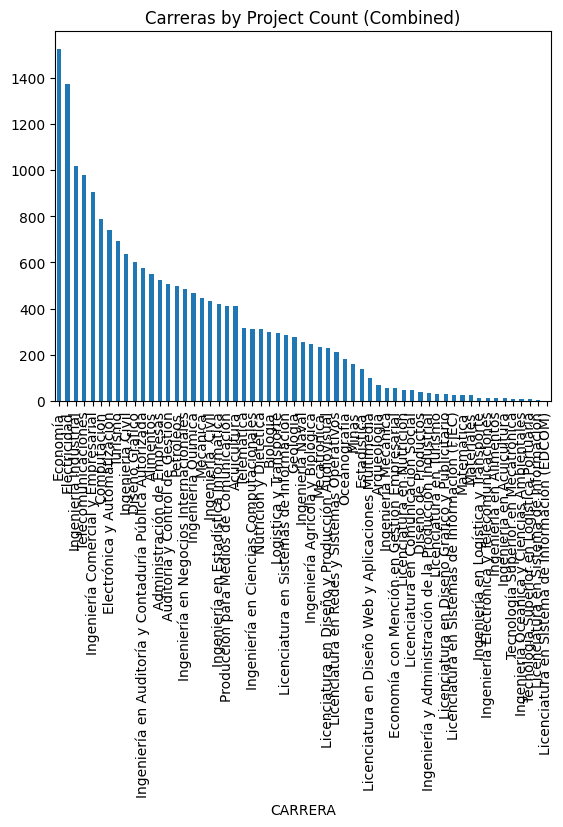

In [98]:
df_projects_combined["CARRERA"].value_counts().plot(kind='bar', title='Carreras by Project Count (Combined)')
print(df_projects_combined["CARRERA"].value_counts())

## Save

In [ ]:
df_projects_complete.to_csv('data/projects.csv', index=False)
print("Data saved to data/projects.csv")

Data saved to data/projects_complete.csv
